In [1]:
#Importando as bibliotecas necessárias para a visualização# 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime

In [3]:
# lendo os dados##
gryniaxdolar = pd.read_csv(r'C:\Users\ahcar\Downloads\ukr.csv')
gryniaxdolar.rename(columns={'Último': 'Price', 'Data': 'Date','Máxima': 'High','Mínima': 'Low', 'Var%': 'Change%', 'Abertura': 'Open',}, inplace=True)

In [4]:
gryniaxdolar

,Date,Price,Open,High,Low,Change%
0,7.2022,"29,4025","29,5437","29,5485","29,4000","0,52"
1,6.2022,"29,2500","29,4000","29,5500","29,3987","-0,98"
2,5.2022,"29,5400","29,4000","30,2710","29,3987","-2,35"
3,4.2022,"30,2500","29,4000","30,3995","29,4000","2,54"
4,3.2022,"29,5000","29,4000","30,0500","29,3900","-1,83"
...,...,...,...,...,...,...
88,3.2015,"23,4429","26,7500","26,7500","21,3272","-13,97"
89,2.2015,"27,2500","16,2075","33,7500","16,0690","68,65"
90,1.2015,"16,1575","15,8185","16,6700","15,6215","2,47"
91,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gryniaxdolar = gryniaxdolar[['Date', 'Price']]

In [6]:
gryniaxdolar = gryniaxdolar.dropna()

In [7]:
gryniaxdolar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    91 non-null     float64
 1   Price   91 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


In [8]:
reversed_df = gryniaxdolar.iloc[::-1]

In [9]:
reversed_df

,Date,Price
90,1.2015,"16,1575"
89,2.2015,"27,2500"
88,3.2015,"23,4429"
87,4.2015,"21,2500"
86,5.2015,"20,9500"
...,...,...
4,3.2022,"29,5000"
3,4.2022,"30,2500"
2,5.2022,"29,5400"
1,6.2022,"29,2500"


In [10]:
## transformando a variavel ''Date'' em datetime (explicar o que é datetime) #
inicio_date = datetime.date(2015, 1, 1)
fim_date = datetime.date(2022, 7, 1)
delta = relativedelta(months=1)
datas = []
while (inicio_date <= fim_date):
    datas.append(inicio_date)
    inicio_date += delta
for registro in range(len(reversed_df)):
    reversed_df.loc[registro, 'datetime'] = datas[registro]



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
# colocando a Data como índice
grynia3 = reversed_df.set_index('datetime')


In [12]:
grynia3 = reversed_df.drop(columns=['Date'])

In [13]:
reversed_df

,Date,Price,datetime
90,1.2015,"16,1575",2022-07-01
89,2.2015,"27,2500",2022-06-01
88,3.2015,"23,4429",2022-05-01
87,4.2015,"21,2500",2022-04-01
86,5.2015,"20,9500",2022-03-01
...,...,...,...
4,3.2022,"29,5000",2015-05-01
3,4.2022,"30,2500",2015-04-01
2,5.2022,"29,5400",2015-03-01
1,6.2022,"29,2500",2015-02-01


In [14]:
grynia3.set_index('datetime', inplace=True)

In [15]:
grynia3['Price'] = grynia3['Price'].str.replace(',','.').astype(float)

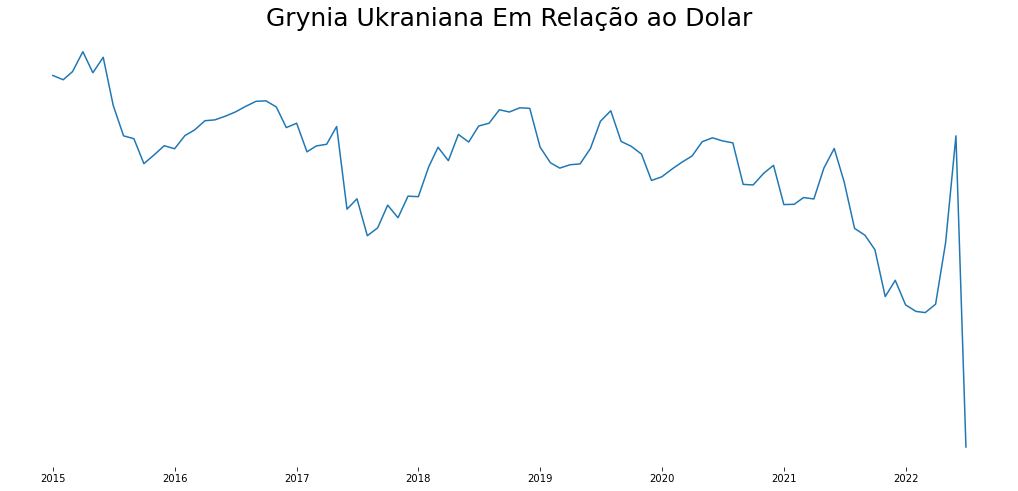

In [16]:
plt.figure(figsize=(18, 8)) 
  
plt.plot(grynia3) 

plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
plt.title('Grynia Ukraniana Em Relação ao Dolar', fontsize=25)

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.show()